In [1]:
# Import required libraries
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datetime import datetime

# Set plotting style - using a simpler approach
plt.style.use('default')  # Changed from 'seaborn' to 'default'
sns.set_theme()  # This will set a nice seaborn theme

# Set random seed for reproducibility
np.random.seed(42)

# Load the crime data
data_path = Path('../data/london_burglaries.parquet')
df = pl.read_parquet(data_path)

# Display basic information
print("Dataset shape:", df.shape)
print("\nColumns:")
print(df.columns)
print("\nSample data:")
df.head()

# Convert timestamp to datetime and extract relevant features
df = df.with_columns([
    pl.col('Month').str.strptime(pl.Date, format='%Y-%m').alias('date'),
    pl.col('LSOA code').alias('lsoa_code'),
    pl.col('Crime type').alias('crime_type')
])

# Display the first few rows after conversion
print("\nAfter datetime conversion:")
print(df.select(['date', 'lsoa_code', 'crime_type']).head())

Dataset shape: (911828, 12)

Columns:
['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude', 'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type', 'Last outcome category', 'Context']

Sample data:

After datetime conversion:
shape: (5, 3)
┌────────────┬───────────┬────────────┐
│ date       ┆ lsoa_code ┆ crime_type │
│ ---        ┆ ---       ┆ ---        │
│ date       ┆ str       ┆ str        │
╞════════════╪═══════════╪════════════╡
│ 2024-05-01 ┆ E01000696 ┆ Burglary   │
│ 2013-02-01 ┆ E01001687 ┆ Burglary   │
│ 2019-03-01 ┆ E01032790 ┆ Burglary   │
│ 2016-05-01 ┆ E01035650 ┆ Burglary   │
│ 2022-11-01 ┆ E01002641 ┆ Burglary   │
└────────────┴───────────┴────────────┘


C:\Users\20231749\AppData\Local\Temp\ipykernel_18948\836728734.py:3: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  pl.count().alias('crime_count')


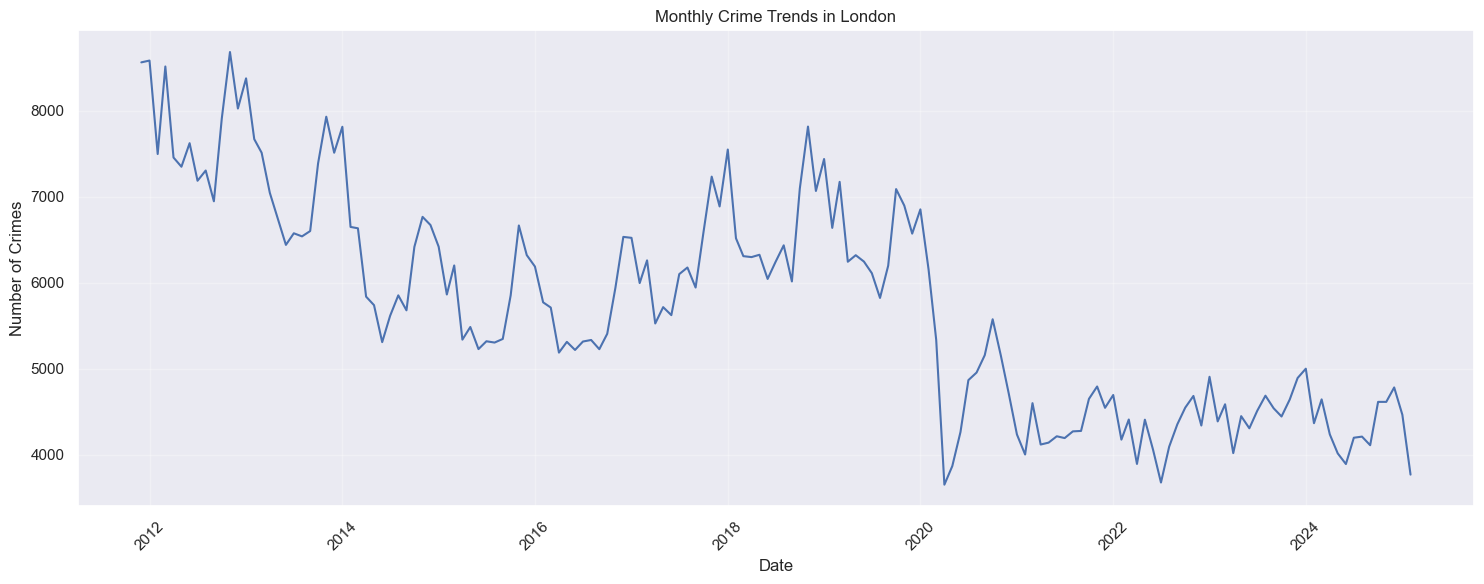

C:\Users\20231749\AppData\Local\Temp\ipykernel_18948\836728734.py:19: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  pl.count().alias('crime_count')
C:\Users\20231749\AppData\Local\Temp\ipykernel_18948\836728734.py:40: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  pl.count().alias('crime_count')
C:\Users\20231749\AppData\Local\Temp\ipykernel_18948\836728734.py:44: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  heatmap_data = monthly_year_crimes.pivot(



Top 5 LSOAs with highest crime rates:
shape: (5, 2)
┌───────────┬─────────────┐
│ lsoa_code ┆ crime_count │
│ ---       ┆ ---         │
│ str       ┆ u32         │
╞═══════════╪═════════════╡
│ E01035716 ┆ 3850        │
│ E01032739 ┆ 2208        │
│ E01004763 ┆ 1960        │
│ E01033708 ┆ 1751        │
│ E01004734 ┆ 1614        │
└───────────┴─────────────┘

Basic Statistics:
Total number of crimes: 911828
Date range: from 2011-12-01 to 2025-02-01
Number of unique LSOAs: 4990
Average crimes per month: 5734.77
Standard deviation: 1249.98


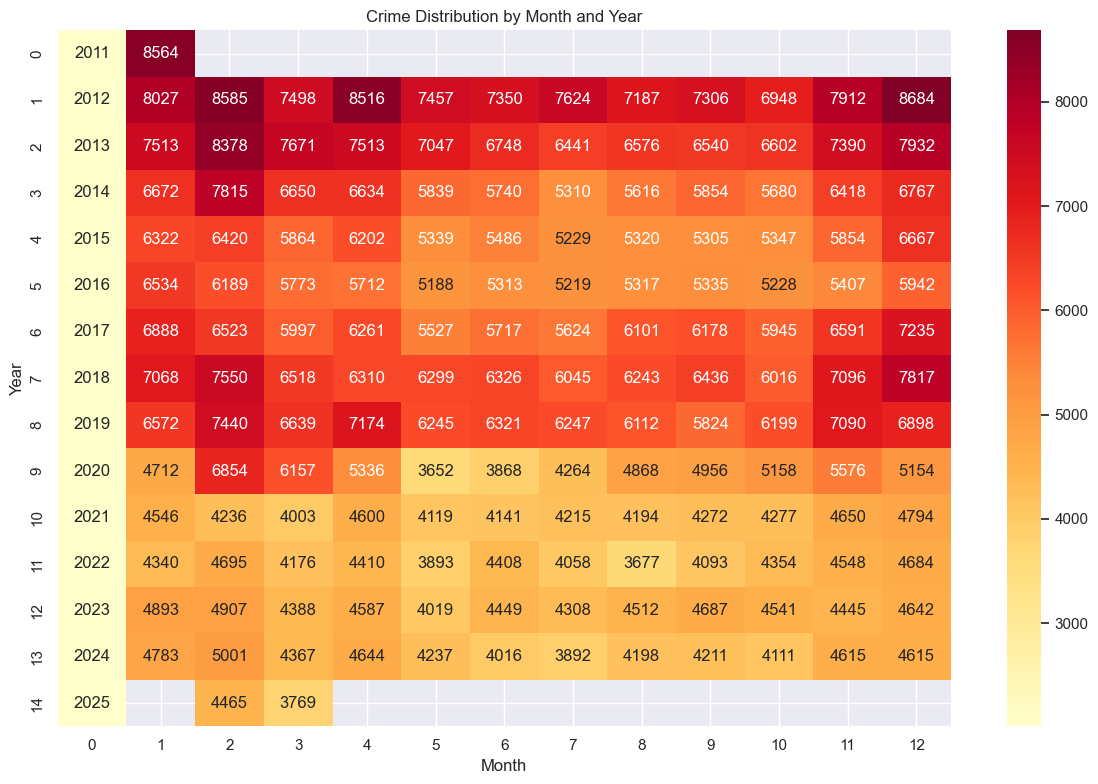

In [2]:
# 1. Analyze monthly crime trends
monthly_crimes = df.group_by('date').agg(
    pl.count().alias('crime_count')
).sort('date')

# Plot monthly crime trends
plt.figure(figsize=(15, 6))
plt.plot(monthly_crimes['date'], monthly_crimes['crime_count'])
plt.title('Monthly Crime Trends in London')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Analyze crime distribution by LSOA
lsoa_crimes = df.group_by('lsoa_code').agg(
    pl.count().alias('crime_count')
).sort('crime_count', descending=True)

print("\nTop 5 LSOAs with highest crime rates:")
print(lsoa_crimes.head())

# 3. Calculate basic statistics
print("\nBasic Statistics:")
print(f"Total number of crimes: {len(df)}")
print(f"Date range: from {df['date'].min()} to {df['date'].max()}")
print(f"Number of unique LSOAs: {df['lsoa_code'].n_unique()}")
print(f"Average crimes per month: {monthly_crimes['crime_count'].mean():.2f}")
print(f"Standard deviation: {monthly_crimes['crime_count'].std():.2f}")

# 4. Create a heatmap of crime distribution by month and year
df = df.with_columns([
    pl.col('date').dt.year().alias('year'),
    pl.col('date').dt.month().alias('month')
])

monthly_year_crimes = df.group_by(['year', 'month']).agg(
    pl.count().alias('crime_count')
).sort(['year', 'month'])

# Reshape data for heatmap
heatmap_data = monthly_year_crimes.pivot(
    values='crime_count',
    index='year',
    columns='month'
)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='.0f')
plt.title('Crime Distribution by Month and Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

C:\Users\20231749\AppData\Local\Temp\ipykernel_25016\348158939.py:31: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias('crime_count'))
C:\Users\20231749\AppData\Local\Temp\ipykernel_25016\348158939.py:59: CategoricalRemappingWarning: Local categoricals have different encodings, expensive re-encoding is done to perform this merge operation. Consider using a StringCache or an Enum type if the categories are known in advance
  lsoa_lookup = pl.read_parquet('../data/london_areas_lookup.parquet')


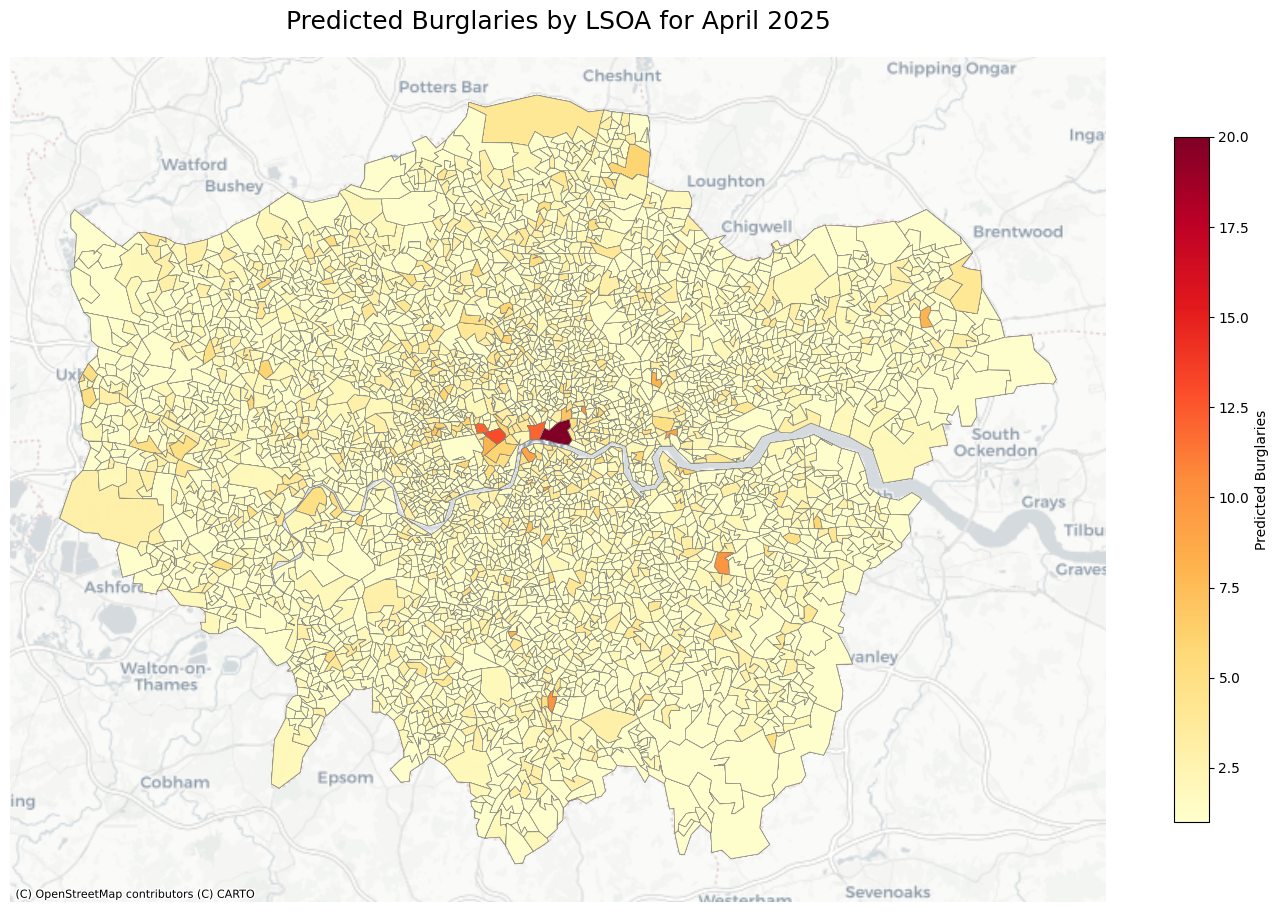

In [6]:
# Import required libraries
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from statsmodels.tsa.statespace.sarimax import SARIMAX
import geopandas as gpd
import contextily as ctx

# Set plotting style
plt.style.use('default')

# Set random seed for reproducibility
np.random.seed(42)

# Load the crime data
data_path = Path('../data/london_burglaries.parquet')
df = pl.read_parquet(data_path)

# Convert timestamp to datetime and extract relevant features
df = df.with_columns([
    pl.col('Month').str.strptime(pl.Date, format='%Y-%m').alias('date'),
    pl.col('LSOA code').alias('lsoa_code'),
    pl.col('Crime type').alias('crime_type')
])

# Aggregate monthly counts
monthly_lsoa_crimes = (
    df.group_by(['date', 'lsoa_code'])
      .agg(pl.count().alias('crime_count'))
      .sort(['lsoa_code', 'date'])
)

# Convert to pandas for quick test
monthly_lsoa_crimes_pd = pd.DataFrame({
    col: monthly_lsoa_crimes[col].to_list()
    for col in monthly_lsoa_crimes.columns
})

# Naïve “last-value” forecast on a 10-LSOA sample
sample_lsoas = monthly_lsoa_crimes_pd['lsoa_code'].unique()
predictions = {}
for lsoa in sample_lsoas:
    series = (
        monthly_lsoa_crimes_pd
        .loc[monthly_lsoa_crimes_pd['lsoa_code'] == lsoa]
        .set_index('date')['crime_count']
    )
    predictions[lsoa] = series.iloc[-1]  # naive forecast

# Build predictions DataFrame
predictions_df = pd.DataFrame({
    'lsoa_code': list(predictions.keys()),
    'predicted_crimes': list(predictions.values())
})

# (Optional) attach human-readable LSOA names
lsoa_lookup = pl.read_parquet('../data/london_areas_lookup.parquet')
lookup_dicts = lsoa_lookup.select(['LSOA21CD','LSOA21NM']).to_dicts()
lsoa_lookup_pd = pd.DataFrame(lookup_dicts)
predictions_df = predictions_df.merge(
    lsoa_lookup_pd,
    left_on='lsoa_code',
    right_on='LSOA21CD',
    how='left'
)

# === Choropleth on London map via GeoPackage ===

# 1) Load your GeoPackage layer of London LSOAs
lsoa_gdf = gpd.read_file('C:\\Users\\20231749\\OneDrive - TU Eindhoven\\Documents\\GitHub\\4CBLW00-20-Group1\\data\\geo\\london_lsoa.gpkg')

# 2) Rename to match our codes
lsoa_gdf = lsoa_gdf.rename(columns={'LSOA21CD': 'lsoa_code'})

# 3) Merge predictions into the GeoDataFrame
map_df = lsoa_gdf.merge(
    predictions_df[['lsoa_code', 'predicted_crimes']],
    on='lsoa_code',
    how='left'
)

# Optional: load borough boundaries for overlay and labels (commented out)
# boroughs = gpd.read_file('path_to_london_boroughs.geojson')
# boroughs = boroughs.to_crs(epsg=3857)

# Project to Web Mercator for basemap
map_df_3857 = map_df.to_crs(epsg=3857)

fig, ax = plt.subplots(1, 1, figsize=(14, 14))

# Plot LSOA polygons with smooth continuous color shading
map_df_3857.plot(
    column='predicted_crimes',
    cmap='YlOrRd',            # or 'OrRd', 'viridis', etc.
    legend=True,
    legend_kwds={
        'label': "Predicted Burglaries",
        'shrink': 0.5
    },
    alpha=0.9,
    linewidth=0.4,
    edgecolor='grey',
    ax=ax
)

# Optional: plot borough boundaries overlay
# boroughs.boundary.plot(ax=ax, color='black', linewidth=1)

# Optional: add borough labels
# for idx, row in boroughs.iterrows():
#     ax.annotate(
#         text=row['name'],  # Adjust to borough name field
#         xy=(row.geometry.centroid.x, row.geometry.centroid.y),
#         ha='center',
#         fontsize=11,
#         color='black',
#         weight='bold'
#     )

# Add basemap with subtle background
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

ax.set_axis_off()
ax.set_title('Predicted Burglaries by LSOA for April 2025', fontsize=18, pad=20)

plt.tight_layout()
plt.show()
